# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [3]:
#### AUTOCORRELATION FUNCTION ####

import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(x, nsteps):
    ac = np.zeros(nsteps)
    t_max = len(x)
    sigma = np.std(x)
    for delta_t in range(nsteps):
        a = 0.0
        b = 0.0
        c = 0.0
        t_fin = t_max - delta_t
        for t in range(t_fin):
            a += x[t]* x[t+delta_t]
            b += x[t]
            c += x[t+delta_t]
        ac[delta_t] = ((a/t_fin) - (b/t_fin) * (c/t_fin)) / (sigma **2)

    return ac

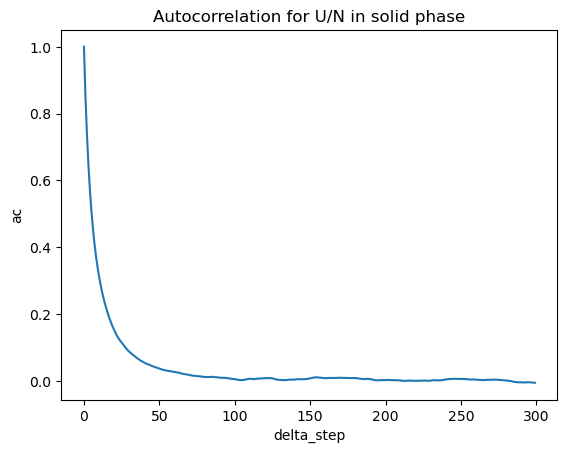

In [16]:
#### CALCOLO E DISEGNO AUTOCORRELAZIONE FASE SOLIDA ####

U_solid = np.loadtxt('../OUTPUT/500k_solid_U.dat', usecols = (1))

plt.plot(autocorrelation(U_solid, 300))
plt.title('Autocorrelation for U/N in solid phase')
plt.xlabel('delta_step')
plt.ylabel('ac')
plt.show()
    

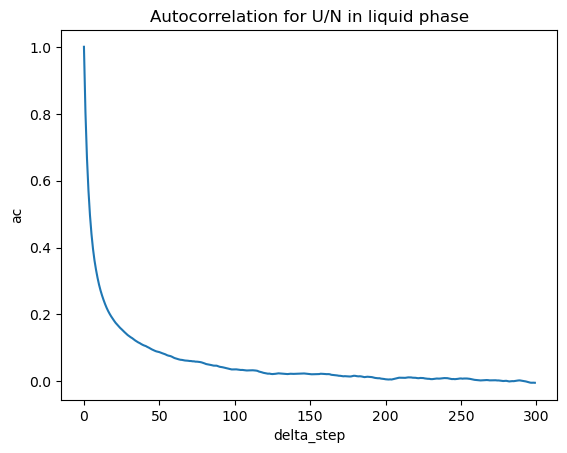

In [17]:
#### CALCOLO E DISEGNO AUTOCORRELAZIONE FASE LIQUIDA ####

U_solid = np.loadtxt('../OUTPUT/500k_liquid_U.dat', usecols = (1))

plt.plot(autocorrelation(U_solid, 300))
plt.title('Autocorrelation for U/N in liquid phase')
plt.xlabel('delta_step')
plt.ylabel('ac')
plt.show()
    

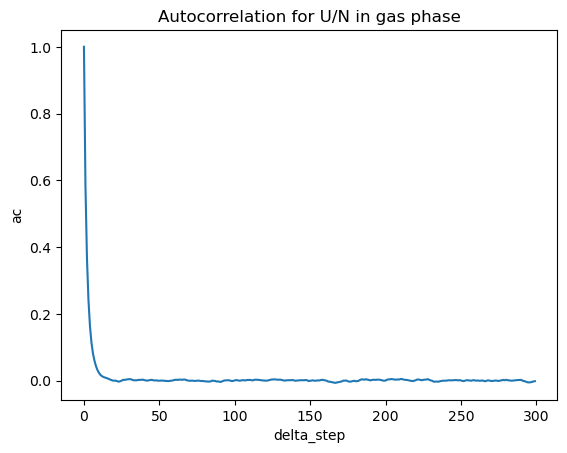

In [18]:
#### CALCOLO E DISEGNO AUTOCORRELAZIONE FASE GASSOSA ####

U_solid = np.loadtxt('../OUTPUT/500k_gas_U.dat', usecols = (1))

plt.plot(autocorrelation(U_solid, 300))
plt.title('Autocorrelation for U/N in gas phase')
plt.xlabel('delta_step')
plt.ylabel('ac')
plt.show()
    

For solid and liquid phases in approximately 300 steps the energies become totally uncorrelated, while due to its untidier state, gas phase just takes about 20 steps.

After having determined how correlation evolves with the number of steps, in the following cells we will study the behaviour of the usual stathistical standard deviation computed by a data blocking method, and how it changes at the varying of the blocks length.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def block_av( values_arr, L ):

    averages_arr = []
    N = len(values_arr) / L # N number of blocks, L length of each block

    if not((len(values_arr)) % L == 0) :
        print("number of values must be divisible by number of blocks ")
        return 1

    for i in range(0, int(N)):
        sum = 0
        for j in range (0, L):
            sum += values_arr[i*L + j]
        averages_arr.append(sum/L)

    sum = 0
    sum2 = 0
    for i in range(0, int(N)):
        sum += averages_arr[i]
        sum2 += averages_arr[i]**2

    average = sum / N
    error = np.sqrt((sum2/N - average**2)/N)
    return (average, error)

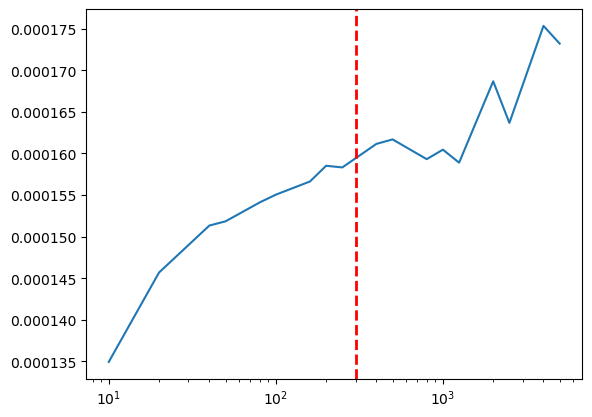

In [6]:
#reading every instant value for U for gas
U_arr_gas = np.zeros(500000, float)

with open("../OUTPUT/500k_gas_U.dat", 'r') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    U_arr_gas[i] = float(line.split()[1])

#calculating average and error by data blocking for different block lengths
L = []
U_blockav_gas = []
U_blockerr_gas = []

for i in range(10, 5001, 10):
    if(500000 % i) == 0:
        L.append(i) #block length
        U_blockav_gas.append(block_av(U_arr_gas, i)[0])
        U_blockerr_gas.append(block_av(U_arr_gas, i)[1])


plt.plot(L, U_blockerr_gas)
plt.xscale('log')
plt.axvline(x=300, color='r', linestyle='--', linewidth=2, label='Vertical Line')
plt.show()

Above: the standard deviation for U of a gas against the length of the blocks of data blocking.

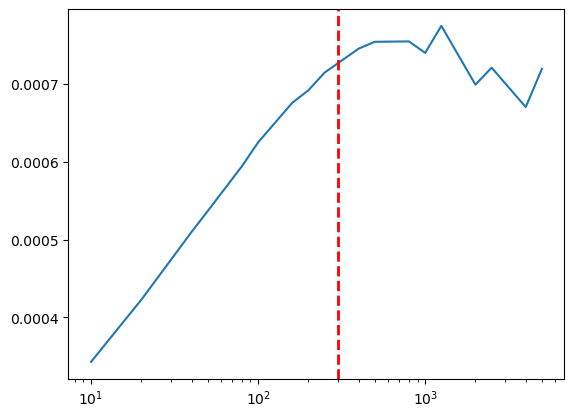

In [8]:
#reading every instant value for U for gas
U_arr_liquid = np.zeros(500000, float)

with open("../OUTPUT/500k_liquid_U.dat", 'r') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    U_arr_liquid[i] = float(line.split()[1])

#calculating average and error by data blocking for different block lengths
L = []
U_blockav_liquid = []
U_blockerr_liquid = []

for i in range(10, 5001, 10):
    if(500000 % i) == 0:
        L.append(i) #block length
        U_blockav_liquid.append(block_av(U_arr_liquid, i)[0])
        U_blockerr_liquid.append(block_av(U_arr_liquid, i)[1])


plt.plot(L, U_blockerr_liquid)
plt.xscale('log')
plt.axvline(x=300, color='r', linestyle='--', linewidth=2, label='Vertical Line')
plt.show()

Above: the standard deviation for U of a liquid against the length of the blocks of data blocking.

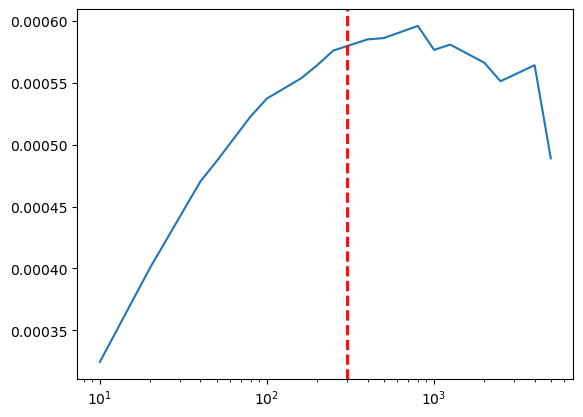

In [9]:
#reading every instant value for U for gas
U_arr_solid = np.zeros(500000, float)

with open("../OUTPUT/500k_solid_U.dat", 'r') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    U_arr_solid[i] = float(line.split()[1])

#calculating average and error by data blocking for different block lengths
L = []
U_blockav_solid = []
U_blockerr_solid = []

for i in range(10, 5001, 10):
    if(500000 % i) == 0:
        L.append(i) #block length
        U_blockav_solid.append(block_av(U_arr_solid, i)[0])
        U_blockerr_solid.append(block_av(U_arr_solid, i)[1])


plt.plot(L, U_blockerr_solid)
plt.xscale('log')
plt.axvline(x=300, color='r', linestyle='--', linewidth=2, label='Vertical Line')
plt.show()

Above: the standard deviation for U of a solid against the length of the blocks of data blocking.

As we can infer from the graphs above, there is an initial interval where the error increases monotonically with the block size, but when the block length becomes greater than the length of uncorrelation  (about 200 steps) the standard deviation remains stable

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

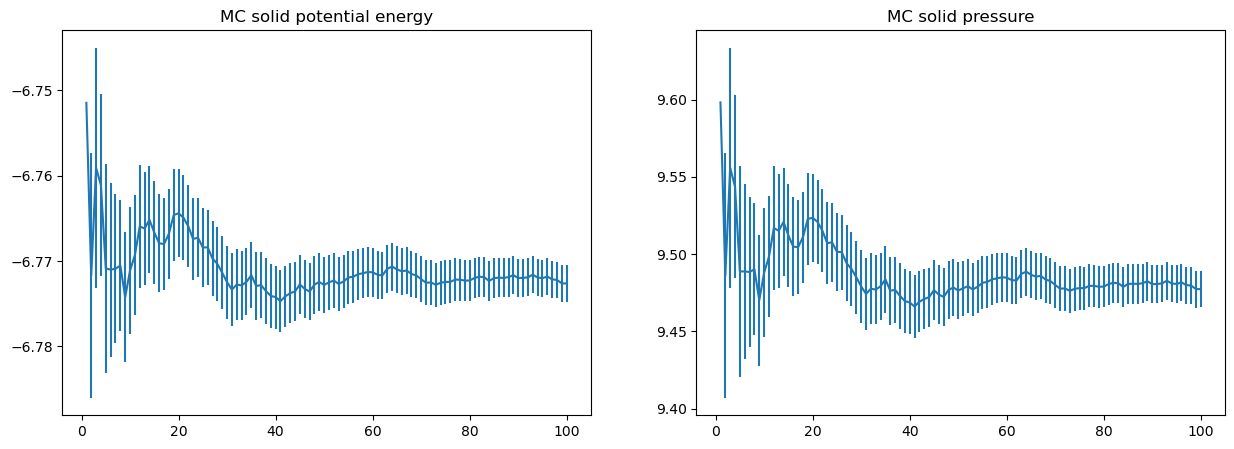

In [49]:
#### MC solid phase U/N, P ####
n, U , Uerr = np.loadtxt("../OUTPUT/potential_energy.dat", usecols= (0,2,3), unpack = "true")
P, Perr = np.loadtxt("../OUTPUT/pressure.dat", usecols= (2,3), unpack = "true")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.errorbar(n, U, yerr = Uerr)
ax1.set_title("MC solid potential energy")
ax2.errorbar(n, P, yerr = Perr)
ax2.set_title("MC solid pressure")

plt.show()

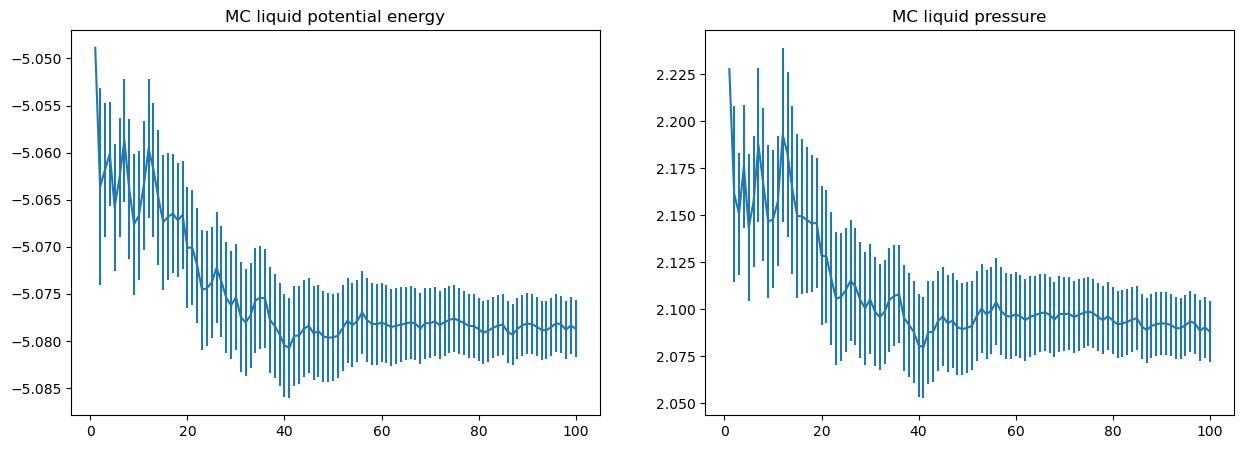

In [50]:
#### MC liquid phase U/N, P ####
n, U , Uerr = np.loadtxt("../OUTPUT/potential_energy.dat", usecols= (0,2,3), unpack = "true")
P, Perr = np.loadtxt("../OUTPUT/pressure.dat", usecols= (2,3), unpack = "true")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.errorbar(n, U, yerr = Uerr)
ax1.set_title("MC liquid potential energy")
ax2.errorbar(n, P, yerr = Perr)
ax2.set_title("MC liquid pressure")

plt.show()

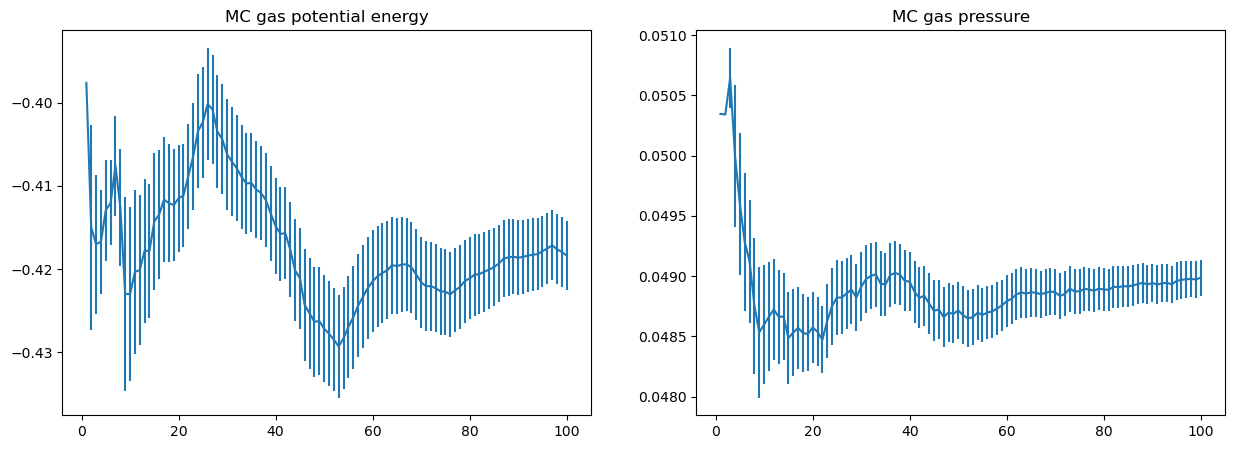

In [51]:
#### MC gas phase U/N, P ####
n, U , Uerr = np.loadtxt("../OUTPUT/potential_energy.dat", usecols= (0,2,3), unpack = "true")
P, Perr = np.loadtxt("../OUTPUT/pressure.dat", usecols= (2,3), unpack = "true")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.errorbar(n, U, yerr = Uerr)
ax1.set_title("MC gas potential energy")
ax2.errorbar(n, P, yerr = Perr)
ax2.set_title("MC gas pressure")

plt.show()

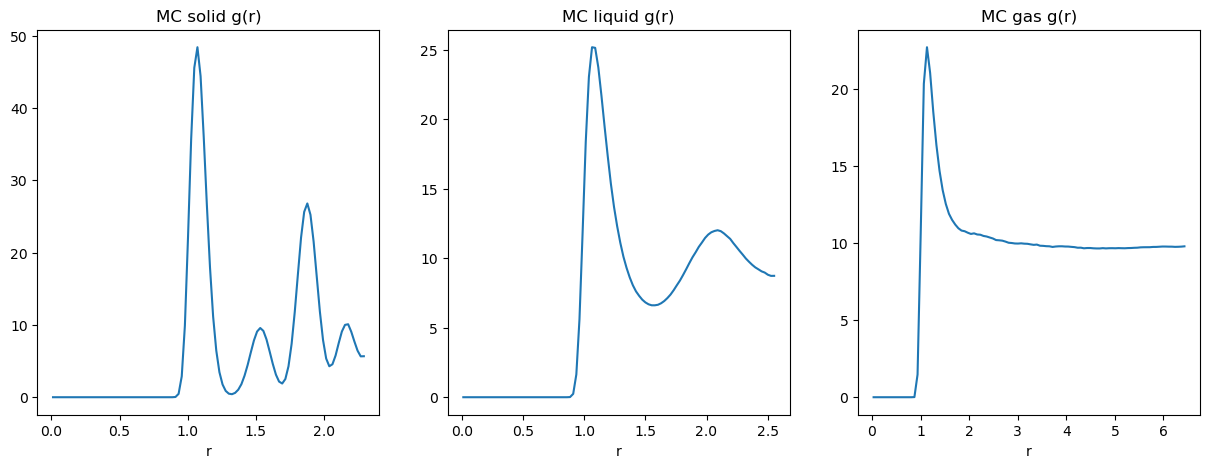

In [67]:
#### solid, liquid and gas g(r) with MC ####
r1, gofr_solid_MC, gerr = np.loadtxt("../OUTPUT/gofr_solid_MC.dat", usecols= (0,1,2), unpack = "true")
r2, gofr_liquid_MC, gerr = np.loadtxt("../OUTPUT/gofr_liquid_MC.dat", usecols= (0,1,2), unpack = "true")
r3, gofr_gas_MC, gerr = np.loadtxt("../OUTPUT/gofr_gas_MC.dat", usecols= (0,1,2), unpack = "true")



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(r1, gofr_solid_MC)
ax1.set_title("MC solid g(r)")
ax1.set_xlabel("r")
ax2.plot(r2, gofr_liquid_MC)
ax2.set_title("MC liquid g(r)")
ax2.set_xlabel("r")
ax3.plot(r3, gofr_gas_MC)
ax3.set_title("MC gas g(r)")
ax3.set_xlabel("r")

plt.show()


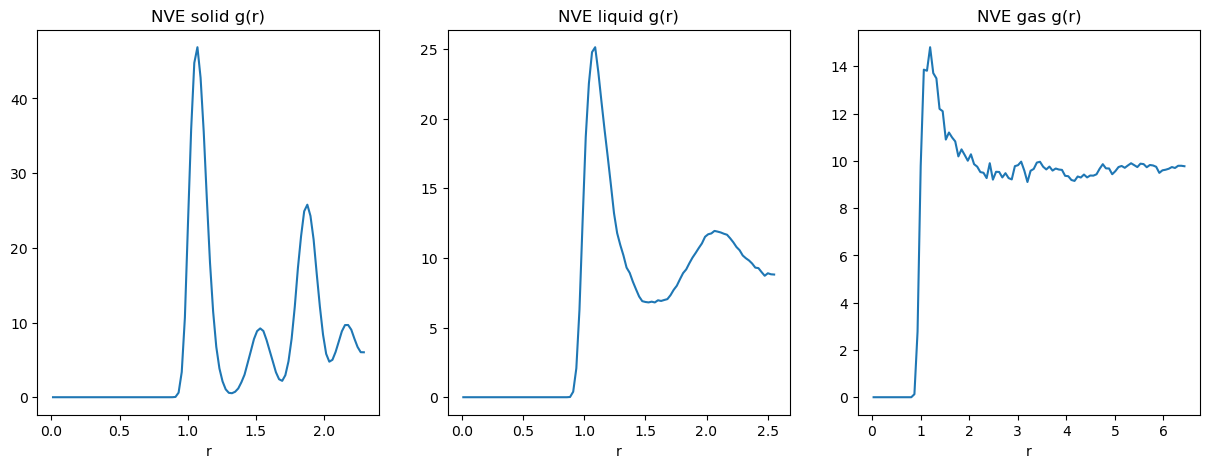

In [66]:
#### solid, liquid and gas g(r) with NVE ####
r1, gofr_solid_NVE, gerr = np.loadtxt("../OUTPUT/gofr_solid_NVE.dat", usecols= (0,1,2), unpack = "true")
r2, gofr_liquid_NVE, gerr = np.loadtxt("../OUTPUT/gofr_liquid_NVE.dat", usecols= (0,1,2), unpack = "true")
r3, gofr_gas_NVE, gerr = np.loadtxt("../OUTPUT/gofr_gas_NVE.dat", usecols= (0,1,2), unpack = "true")



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(r1, gofr_solid_NVE)
ax1.set_title("NVE solid g(r)")
ax1.set_xlabel("r")
ax2.plot(r2, gofr_liquid_NVE)
ax2.set_title("NVE liquid g(r)")
ax2.set_xlabel("r")
ax3.plot(r3, gofr_gas_NVE)
ax3.set_title("NVE gas g(r)")
ax3.set_xlabel("r")

plt.show()

The g(r) behaves approximately the same between 0 and 1, it starts at 0 and begins to rise sharply, but there can be seen differences when the distance increases. The solid curve is much more compact and reaches highier values of g(r), showing several peaks. This is because its cristalline structure which does not allow particles to move freely. However, in the gas phase particles can move more freely, and so the curve smoothly covers a larger interval of distances, showing that particles are not as bound one to the other as in the solid. Finally an intermediate behaviour is observed fo rthe liquid phase.

NVE and MC models result in according graphs for the g(r) distribution, meaning that the two models converge to the same result and are thus equivalent. The most problematic phase in this sense is gas: we can see a smooth curve from the MC simulation but the same curve is much more peaky and noisy with the NVE method, and also the first peak reaches two diffferent heights.